## Lab-proyecto 3

* Lohana Sánchez Benavides - 2017239552
* Moisés Salguero Morales - 2017238398


En este Lab-proyecto se analizarán diferentes tipos de modulación de Amplitud (AM). Como la modulación de doble banda lateral con portadora suprimida DSB-SC y DSB-LC. Para esto se haran pruebas frecuencias y amplitudes predefinidas y observará gráficas en tiempo y frecuencia para los diversos análisis. 

## Modulación AM DSB-SC

En esta sección se analiza una modulación de doble banda lateral con portadora suprimida (AM-DSB-SC). En este caso se realizará una función que module y otra que demodule la señal con el mensaje. Se presentan tanto para la sección de modulación como demodulación gráficas en el tiempo y en la frecuencia para las señales moduladora _m_, portadora _c_ y la modulada _s_. 
Se usaron frecuencias _f<sub>m_=50, _f<sub>c_=500 y amplitudes _A<sub>c_=1 y _A<sub>m_=1.



Primeramente se importaron todas las librerías que se utilizarán a lo largo de la notebook 

In [2]:
# importación de librerías 

import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
from scipy import signal 
from scipy import linalg
import scipy.constants as spc
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import butter, lfilter, freqz

### Función para modulación 

En esta sección se presenta la función que modula la señal. La señal moduladora se multiplica por la señal portadora, teniendo como resultado la señal modulada. Se grafican en esta función 7 curvas: la señal _m_, la señal _c_, y la señal _s_ en tiempo y frecuencia en su respectivo orden, y finalmente las 3 señales en el tiempo en un mismo gráfico.

Para la parte de modulación con doble banda lateral con portadora suprimida, la señal moduladura, portadora y modulada se tiene una forma como la siguiente:

* _m(t)_ = _cos(2πf<sub>m</sub>⋅ t)_
* _c(t)_ = _A<sub>c</sub>*cos(2πf<sub>c</sub>⋅ t)_
* _s(t)_ = _m(t)⋅ c(t)_



In [ ]:
def modulation(fm, fc, ac):
  # definición de funciones matemáticas 

  # espacio entre muestras
  s = 1/(fc*200)

  # puntos de muestra
  t = np.arange(0, 30/fc, s)     # puntos en t
  tf = np.arange(0, 100/fc, s)   # puntos en t para transformar a frecuencia 

  # numero muestras para frecuencia 
  N = len(tf)
  frec = fftfreq(N, s)           # señal de frecuencia 
  mt = np.cos(2*np.pi*fm*t)      # señal moduladora en el tiempo
  portadora = ac*np.cos(2*np.pi*fc*t) # señal portadora  en el tiempo
  modulada = mt*portadora             # señal modulada en el tiempo


  %matplotlib inline
    #(\u03C9)
  # señal moduladora en el tiempo
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, mt, label = "modulating")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Modulating signal') 

  #señal moduladora en frecuencia 
  mtf= np.cos(2*np.pi*fm*tf)      # señal moduladora en el tiempo para frecuencia 
  mf = fft(mtf)                   # moduladora en frecuencia
  ax2.plot(frec, 1/N * np.abs(mf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Modulating signal') 
  plt.tight_layout()
  plt.show()

  # Señal portadora en tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, portadora, label = "Carrier")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Carrier signal') 
  plt.tight_layout()

  #señal portadora en frecuencia 
  portadora_f = ac*np.cos(2*np.pi*fc*tf) # señal portadora  para frecuencia 
  pf = fft(portadora_f)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(pf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Carrier signal') 
  plt.tight_layout()
  plt.show()

  # señal modulada en el tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, modulada , label = "modulated")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Modulated signal') 
  

  # señal modulada en frecuencia 
  modulada_tf = mtf*portadora_f # señal modulada para frecuencia 
  modulada_f = fft(modulada_tf)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(modulada_f))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Modulated signal') 
  plt.tight_layout()
  plt.show()

  # Vista de tres señales en el tiempo 
  plt.plot(t, mt , label = "modulating")
  plt.plot(t, portadora , label = "carrier")
  plt.plot(t, modulada , label = "modulated")
  plt.legend()
  plt.ylabel("Amplitude")
  plt.xlabel("time (s)")
  plt.title('Modulation signals') 
  plt.show()

  return portadora, portadora_f, modulada, modulada_tf, t, tf, frec, N


En esta sección se llama la función encargada de modular la señal y generar las curvas respectivas. Se utilizó en este caso variables con valores _f<sub>m_=50, _f<sub>c_=500 y _A<sub>c_=1. 

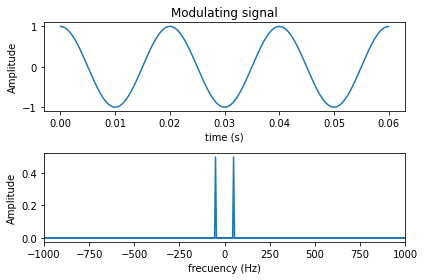

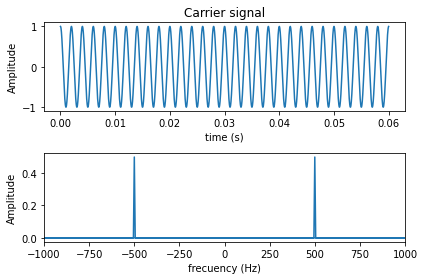

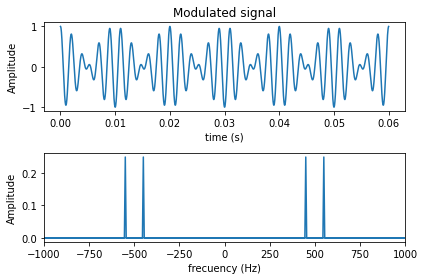

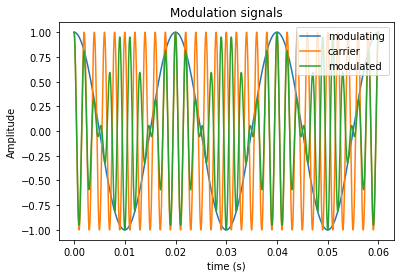

In [ ]:
# valor de frecuencias y amplitud
fm = 50
fc = 500
A = 1

# Llamada a la función moduladora para obtener gráficas 
[portadora, portadora_f, modulada, modulada_tf, t, tf, frec, N] = modulation(fm, fc, A)

Las señales de la portadora y la moduladora, en el tiempo, tienen forma cosenoidales, por lo que en el dominio de la frecuencia se tienen deltas de dirac con una amplitud de 0.5, ya que las amplitudes utilizadas en el tiempo son de 1. Por otro lado. Las frecuencias donde se ubican los deltas, son _±f<sub>m_ (±50) para la moduladora y _±f<sub>c_ (±500) para la portadora que es las frecuencias que se les dio, resepectivamente.

La señal modulada, en el tiempo, es una combinacion de dos cosenos multiplicándose, pero por identidades trigonométricas se puede separar a una suma de cosenos con la mitad de amplitud. Se puede observar, en la gráfica de la señal modulada, se componen de dos frecuencias, la envolvente que tiene una frecuencia baja y una amplitud de 0.5, mientras que la frecuencia alta está dentro de la señal, el mensaje a transmitir está en la envolvente y se observa que se transmite de forma correcta debido a su gran similitud con la moduladora.

En la frecuencia, la amplitud de los deltas son de 0.25 y las frecuencias se ubican en _±(f<sub>m</sub>+f<sub>c</sub>)(±550)_ y en _±(f<sub>m</sub>-f<sub>c</sub>)(±450)_. 

### Demodulación AM DSB-SC 

En esta sección se presenta la función demoduladora, la cual toma la señal modulada en el tiempo y la multiplica por la portadora para obtener la señal original, sin embargo, la señal final tiene otras componentes de alta frecuencia que no pertenecen al mensaje original, y se desean eliminar. Para esto se utiliza un filtro pasa baja que limpia la señal para obtener el resultado esperado. 

Para recuperar el mensaje original se debe multiplicar la señal modulada recibida por la señal portadora con una sincronización coherente.

* _s(t)c(t)_ = _A<sub>c</sub>cos<sup>2</sup>(2πf<sub>c</sub>⋅ t)cos(2πf<sub>m</sub>⋅ t)_

Después de aplicar identidades trigonometricas la forma de la señal se describe de la siguiente manera:
* _s(t)c(t)_ = _A<sub>c</sub>/2cos(2πf<sub>m</sub>⋅ t)+A<sub>c</sub>/4(cos(2πt(f<sub>m</sub>+2f<sub>c</sub>)+(cos(2πt(f<sub>m</sub>-2f<sub>c</sub>))_

Lo anterior indica que se tienen 3 cosenos involucrados en la señal.

La función demodulacion toma como parámetros la señal portadora, una señal portadora con más datos para convertir y graficar en frecuencia, la señal modulada, la señal modulada para convertir y graficar en frecuencia, el tiempo de las muestras, el tiempo para convertir a frecuencia, el vector de frecuencias y el número de datos. 

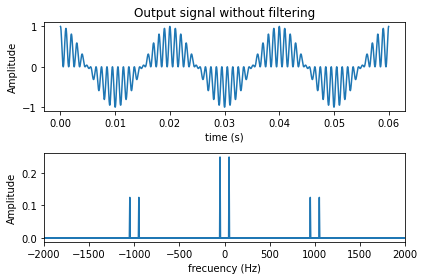

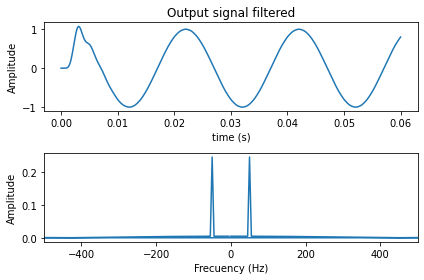

In [ ]:
def demodulacion(portadora, portadora_f, modulada, modulada_tf, t, tf, frec, N): 
  final = modulada*portadora

  # señal de salida sin filtrar en el tiempo 
  fig, (ax1, ax2)  = plt.subplots(2)
  ax1.plot(t, final, label = "Output without filtering")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Output signal without filtering') 

  # señal de salida sin filtrar en la frecuencia 
  semifinal_ft = modulada_tf*portadora_f  # señal portadora  para frecuencia 
  sf = fft(semifinal_ft)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(sf))
  ax2.set_xlim([-2000, 2000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Output signal without filtering in frecuency') 
  plt.tight_layout()
  plt.show()

  # filtrado de la señal 
  sos= signal.butter(10, 50,'low', fs=10000, output='sos')
  y = signal.sosfilt(sos, semifinal_ft)
  
  # graficación de señal final filtrada en t
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(tf[:len(t)], 2*y[:len(final)])
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Output signal filtered') 

  # grafica señal final filtrada en frec
  m=fft(y)
  ax2.plot(frec, 1/N * np.abs(m))
  ax2.set_xlim([-500, 500])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("Frecuency (Hz)")
  #ax2.set_title('Output signal filtered in frecuency') 
  plt.tight_layout()
  plt.show()  
  
demodulacion(portadora, portadora_f, modulada, modulada_tf, t, tf, frec, N)

En el dominio de la frecuencia, como se observa anteriormente, se tienen 4 deltas de dirac con una amplitud de 0.125 ubicados en las frecuencias ±(f<sub>m</sub>-2f<sub>c</sub>) (±1050) y ±(f<sub>m</sub>+2f<sub>c</sub>) (±950), mientras que el par de deltas de dirac ubicados en el centro tiene una frecuencia de (f<sub>m</sub>) (±50) y una amplitud de 0.25, este correponde al mensaje que se desea recuperar con un filtro pasobajo.

Como se observa, la señal de salida sin filtrar tiene una forma sinusoidal de baja frecuencia igual que la señal moduladora, en la gráfica de frecuencia se observa que tiene la misma frecuencia de la señal moduladora, de 50Hz, sin embargo, tiene la componente de alta frecuencia de la señal portadora. Después del filtro pasabajas, se observa en la señal filtrada en el tiempo como sale una señal muy similar a la modulada, y en el dominio de la frecuencia se observa que su frecuencia es de 50Hz, igual que la moduladora original, por lo que el objetivo de modular y demodular se cumplió exitosamente. 



## Control de errores con inserción de ∆𝜔 y 𝜃 en DSC-SC. 

En esta sección se usará el bloque demodulador de la sección anterior para insertar errores en la señal portadora como un cambio de frecuencia ∆𝜔 y una fase 𝜃, despues se analizarán los resultados y cómo afectan estos nuevos valores introducidos a la señal recuperada. 

La ecuación de la señal portadora en el tiempo _C(t)_ queda como: 
- _c(t)_ = _A<sub>c</sub>*cos((𝜔<sub>c</sub> + ∆𝜔 )⋅ t +𝜃)_

A continuación el bloque de demodulación modificado.

In [ ]:
def demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, cambio_f, desface, fc, A): 
  portadora_mod = A*np.cos(2*np.pi*(fc + cambio_f)*t + desface) # señal portadora  en el tiempo
  portadora_mod_f = A*np.cos(2*np.pi*(fc + cambio_f)*tf + desface) # señal portadora  en el tiempo para graficar en frec

  final = modulada*portadora_mod

  # señal de salida sin filtrar en el tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, final, label = "Output without filtering")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Output signal') 

  # señal de salida sin filtrar en la frecuencia 
  semifinal_ft = modulada_tf*portadora_mod_f  # señal portadora  para frecuencia 
  sf = fft(semifinal_ft)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(sf))
  ax2.set_xlim([-2000, 2000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Carrier signal') 
  plt.tight_layout()
  plt.show()

  # aplicación del filtro a señal de salida 
  sos= signal.butter(10, 50,'low', fs=10000, output='sos')
  y = signal.sosfilt(sos, semifinal_ft)

  # gráfica de señal de salida en t
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(tf[:len(t)], 2*y[:len(final)])
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Filtered output signal') 

  # grafica en frec de señal de salida
  m=fft(y)
  ax2.plot(frec, 1/N * np.abs(m))
  ax2.set_xlim([-500, 500])
  ax2.set_ylabel("Amplidute")
  ax2.set_xlabel("Frecuency (Hz)")
  plt.tight_layout()
  plt.show()  

Una vez creado el bloque, se definieron parametros de ∆𝜔 y 𝜃 diversos para realizar pruebas cambiando uno u otro de forma exclusiva y ver cómo afecta la inserción de estos valores a la señal recuperada. 

En el primer caso se va a cambiar solamente el desface, se tiene un valor de _∆𝜔=0 y 𝜃=0.5_: 

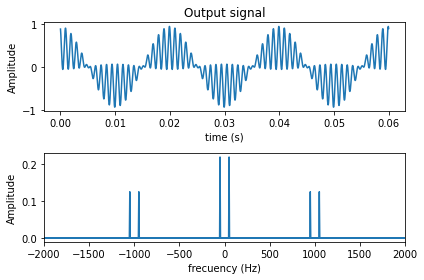

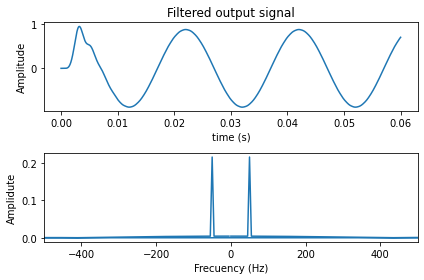

In [ ]:
demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, 0, 0.5, fc, A)

Como se observa, la afectación por desface es pequeña, la señal demodulada casi no sufrió ningún cambio significativo.

Luego, se hará la prueba con una modificación más grande en el desface, esta vez _∆𝜔=0 y 𝜃=1.5_:

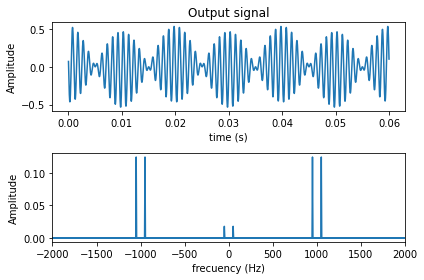

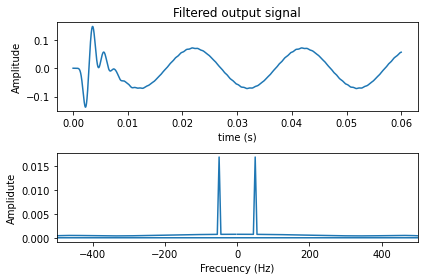

In [ ]:
demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, 0, 1.5, fc, A)

Como se observa en las gráficas de tiempo y frecuencia, la señal demodulada sufrió un cambio significativo en el primer ciclo pero luego la distorción fue pequeña, lo cual es un índice de que el mensaje está levemente modificado pero es totalmente recuperable. 

Luego se hará una modificación de la frecuencia y se analizarán los resultados, el primer caso de modificación  de frecuencia se modificará en 5 su magnitud. 

_∆𝜔=5 y 𝜃=0_:

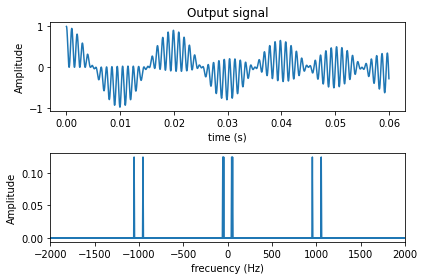

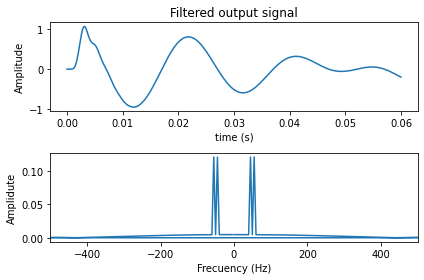

In [ ]:
demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, 5, 0, fc, A)

En este caso se observa que con una modificación pequeña de la frecuencia, el mensaje demodulado está muy distorcionado en comparación con el original, de hecho, si se observa la señal filtrada en frecuencia, se puede notar que existen dos frecuencias diferentes, cuando debería haber solo 1. 

finalmente se modificará más aún la frecuencia como sigue. 

∆𝜔=20 y 𝜃=0:

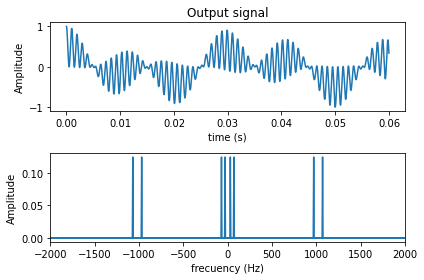

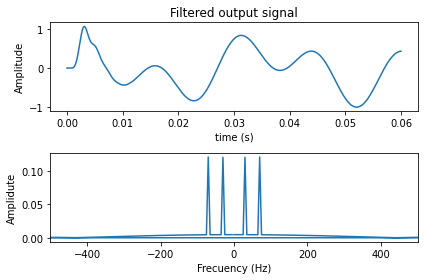

In [ ]:
demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, 20, 0, fc, A)

En este caso se observa que la señal filtrada está totalmente distorcionada y que en el dominio de la frecuencia existen 2 frecuencias bien separadas y definidas cuando debería haber solamente 1. 

## Modulador básico AM DSB-LC

En esta sección se creará una función para el bloque modulador AM DBC-LC, se analizará la función de factor de modulación 𝜇.

En cuanto al proceso de modulación  por AM DSB_LC es diferente al métodode AM DSB-SC ya que se utiliza la siguiente manera:

* _s(t) = A<sub>c</sub>*cos<sup>2</sup>(2πf<sub>c</sub>⋅ t)+K<sub>a</sub>*A<sub>c</sub>cos(2πf<sub>c</sub>⋅ t)cos(2πf<sub>m</sub>⋅ t)_

El valor de K<sub>a</sub> es conocido como sensibilidad de amplitud, y el termino K<sub>a</sub>*A<sub>m</sub> es el que se conoce como factor de modulación 𝜇.

Posteriormente, al aplicar las identidades apropiadas queda algo similar a lo siguiente:

* * _s(t)_ = _A<sub>c</sub>cos(2πf<sub>c</sub>⋅ t)+(A<sub>c</sub>*𝜇)/2(cos(2πt(f<sub>m</sub>+f<sub>c</sub>)+(cos(2πt(f<sub>m</sub>-f<sub>c</sub>))_

En este caso se irá variando el vaor de 𝜇 y se registrará aquellos valores en los que 𝜇 no afecta la señal, en el que afecta levemente la señal y en el que distorciona completamente la señal, tanto que existe una alta sobre modulación. 

A continuación se muestra el bloque de modulación:

In [4]:
def modulation_lc(fm, fc, ac, ka):
  # definición de funciones matemáticas 

  # espacio entre muestras
  s = 1/(fc*200)

  # puntos de muestra
  t = np.arange(0, 30/fc, s)     # puntos en t
  tf = np.arange(0, 100/fc, s)   # puntos en t para transformar a frecuencia 

  # numero muestras para frecuencia 
  N = len(tf)
  frec = fftfreq(N, s)           # señal de frecuencia 
  mt = np.cos(2*np.pi*fm*t)      # señal moduladora en el tiempo
  portadora = ac*np.cos(2*np.pi*fc*t) # señal portadora  en el tiempo
  modulada = portadora + ka*mt*portadora             # señal modulada en el tiempo

  %matplotlib inline
    #(\u03C9)
  # señal moduladora en el tiempo
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, mt, label = "modulating")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Modulating signal') 

  #señal moduladora en frecuencia 
  mtf= np.cos(2*np.pi*fm*tf)      # señal moduladora en el tiempo para frecuencia 
  mf = fft(mtf)                   # moduladora en frecuencia
  ax2.plot(frec, 1/N * np.abs(mf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Modulating signal') 
  plt.tight_layout()
  plt.show()

  # Señal portadora en tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, portadora, label = "Carrier")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Carrier signal') 

  #señal portadora en frecuencia 
  portadora_f = ac*np.cos(2*np.pi*fc*tf) # señal portadora  para frecuencia 
  pf = fft(portadora_f)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(pf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Carrier signal') 
  plt.tight_layout()
  plt.show()

  # señal modulada en el tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, modulada , label = "modulated")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Modulated signal') 
  # señal modulada en frecuencia 
  modulada_tf = portadora_f+ka*mtf*portadora_f # señal modulada para frecuencia 
  modulada_f = fft(modulada_tf)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(modulada_f))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  ax2.set_title('Modulated signal') 
  plt.tight_layout()
  plt.show()

  # Vista de tres señales en el tiempo 
  plt.plot(t, mt , label = "modulating")
  plt.plot(t, portadora , label = "carrier")
  plt.plot(t, modulada , label = "modulated")
  plt.legend()
  plt.ylabel("Amplitude")
  plt.xlabel("time (s)")
  plt.title('Modulation signals') 
  fig.show()

  return 

### Pruebas con diversos valores de 𝜇.

Con 𝜇 = 0.1

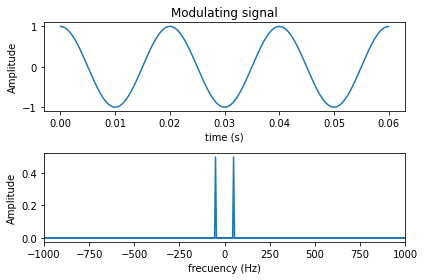

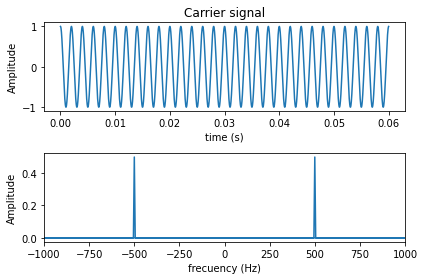

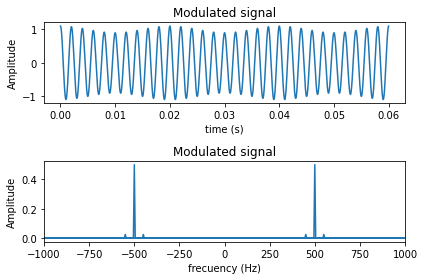

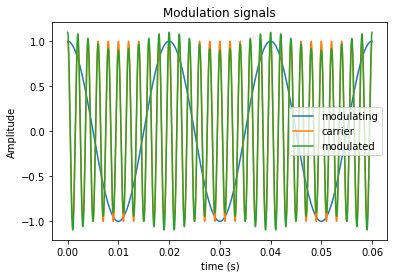

In [ ]:
fm = 50
fc = 500
A = 1
ka = 0.1

modulation_lc(fm, fc, A, ka)

Con un valor de 0.1 la envolvente de la señal modulada casi no se percibe, sin embargo, no existe sobremodulación alguna en la señal, ya que la forma de la envolvente es una señal sinusoidal.

Con 𝜇 =0.5

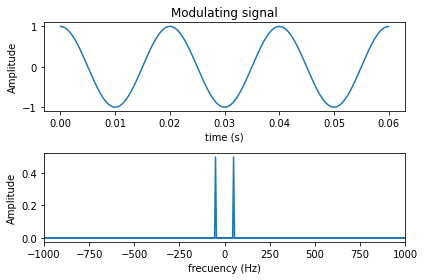

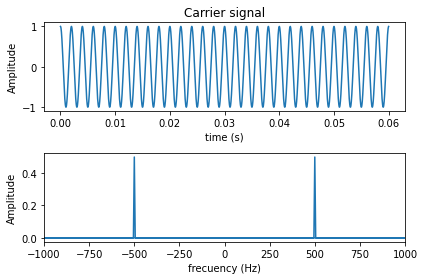

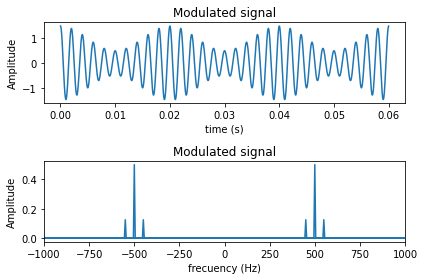

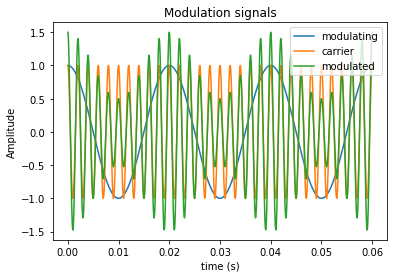

In [ ]:
fm = 50
fc = 500
A = 1
ka = 0.5

modulation_lc(fm, fc, A, ka)

Con el valor anterior de 𝜇, la envolvente de la señal modulada, presenta osiclaciones que se asemejan a la señal moduladora por lo que, es un valor adecuado para eliminar los efectos de sobre modulación. Además, se observa que la señal modulada solo tiene las frecuencias de la señal moduladora y la portadora, no tiene otras frecuencias extra.

Con 𝜇 =1

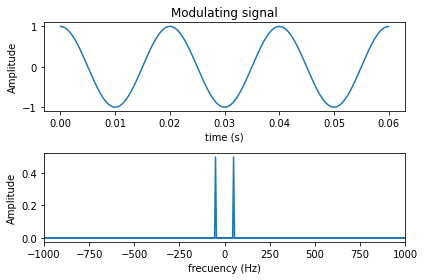

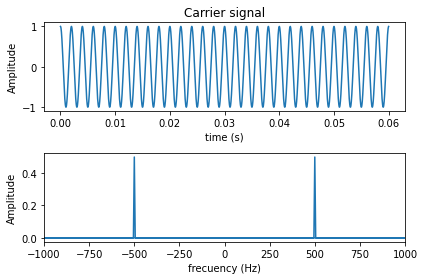

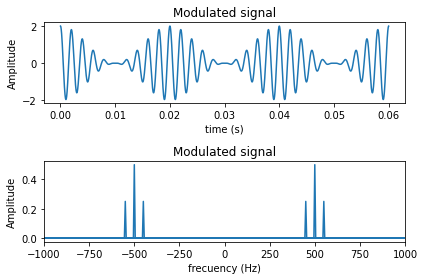

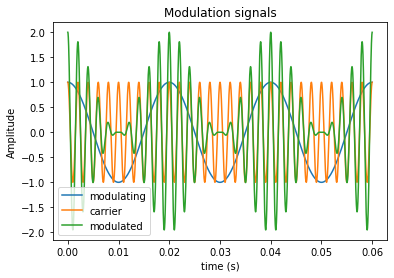

In [ ]:
fm = 50
fc = 500
A = 1
ka = 1

modulation_lc(fm, fc, A, ka)

Con el valor de 1 se incurre en leves problemas de sobremodulación.

* Prueba con 𝜇 = 2: 

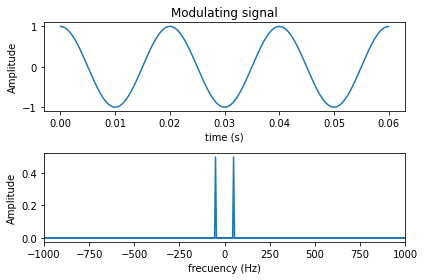

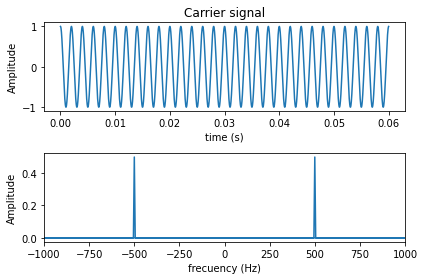

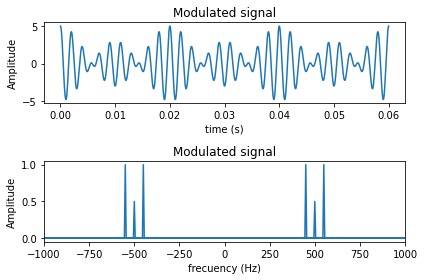

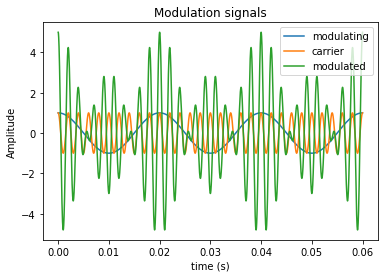

In [5]:
fm = 50
fc = 500
A = 1
ka = 4

modulation_lc(fm, fc, A, ka)

Con un valor de 𝜇 de 4 se tiene una señal modulada con una envolvente que no se asemeja a la señal moduladora. Además, la señal modulada posee variaciones fuertes de amplitud de un tramo a otro. Por lo que se puede indicar, que este es un caso de sobremodulación. 

En el dominio de la frecuencia, se tienen 6 deltas de dirac en total ubicados en ±(f<sub>m</sub>+f<sub>c</sub>), ±(f<sub>m</sub>-f<sub>c</sub>) y ±(f<sub>c</sub>), donde es posible observar que las frecuencia de la portadora,se encuentra presente. No como en el métodod anterior, que la portadora se suprime. Para la amplitud de la portadora se convierte en A<sub>c</sub>/2 y para las demas amplitudes se tiene que (A<sub>c</sub>*𝜇)/4.

Por lo que se ha demostrado para valores de 𝜇 que cumplan con 0<𝜇<1  son los valores donde no hay sobremodulación.